In [1]:
import numpy as np
import networkx as nx
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

# Generate a random social network graph
social_graph = nx.erdos_renyi_graph(100, 0.1)

# Add random text data to each node to represent user profiles, interests, comments, or sentiments
for node in social_graph.nodes:
    # Generate random text representing user profiles, interests, comments, or sentiments
    profile = f"User {node}: "
    interests = ", ".join(np.random.choice(["music", "sports", "movies", "travel"], size=np.random.randint(1, 4)))
    comments = " ".join(np.random.choice(["I love this!", "This is interesting.", "Not my cup of tea."], size=np.random.randint(1, 4)))
    sentiment = np.random.choice(["positive", "neutral", "negative"])

    # Combine profile, interests, comments, and sentiment into one text data
    text_data = f"{profile} Interests: {interests}. Comments: {comments}. Sentiment: {sentiment}"

    social_graph.nodes[node]['text'] = text_data

# Assume you have sentiment labels associated with each node
# In this example, let's assume sentiment labels are derived from the text data (positive, neutral, negative)
sentiment_labels = {node: social_graph.nodes[node]['text'].split()[-1] for node in social_graph.nodes}

# Extract text data and labels from the graph
texts = [social_graph.nodes[node]['text'] for node in social_graph.nodes]
labels = [sentiment_labels[node] for node in social_graph.nodes]

# Convert text labels to binary values (0 for negative, 1 for positive)
label_encoder = LabelEncoder()
labels = label_encoder.fit_transform(labels)

# Tokenize and preprocess the text data
max_words = 10000
max_len = 100
tokenizer = Tokenizer(num_words=max_words)
tokenizer.fit_on_texts(texts)
sequences = tokenizer.texts_to_sequences(texts)
X = pad_sequences(sequences, maxlen=max_len)
y = np.array(labels)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define the RNN model
model = Sequential()
model.add(Embedding(max_words, 32, input_length=max_len))
model.add(LSTM(32))
model.add(Dense(1, activation='sigmoid'))

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
model.fit(X_train, y_train, epochs=5, batch_size=32, validation_split=0.2)

# Evaluate the model on the testing data
loss, accuracy = model.evaluate(X_test, y_test)
print(f'Test accuracy: {accuracy}')

Epoch 1/5
2/2 [==============================] - 13s 3s/step - loss: 0.6905 - accuracy: 0.5312 - val_loss: 0.6738 - val_accuracy: 0.1875
Epoch 2/5
2/2 [==============================] - 0s 141ms/step - loss: 0.6742 - accuracy: 0.3750 - val_loss: 0.6518 - val_accuracy: 0.1875
Epoch 3/5
2/2 [==============================] - 0s 221ms/step - loss: 0.6625 - accuracy: 0.3750 - val_loss: 0.6268 - val_accuracy: 0.1875
Epoch 4/5
2/2 [==============================] - 0s 146ms/step - loss: 0.6475 - accuracy: 0.3750 - val_loss: 0.5978 - val_accuracy: 0.1875
Epoch 5/5
1/1 [==============================] - 0s 59ms/step - loss: 0.6350 - accuracy: 0.5000
Test accuracy: 0.5


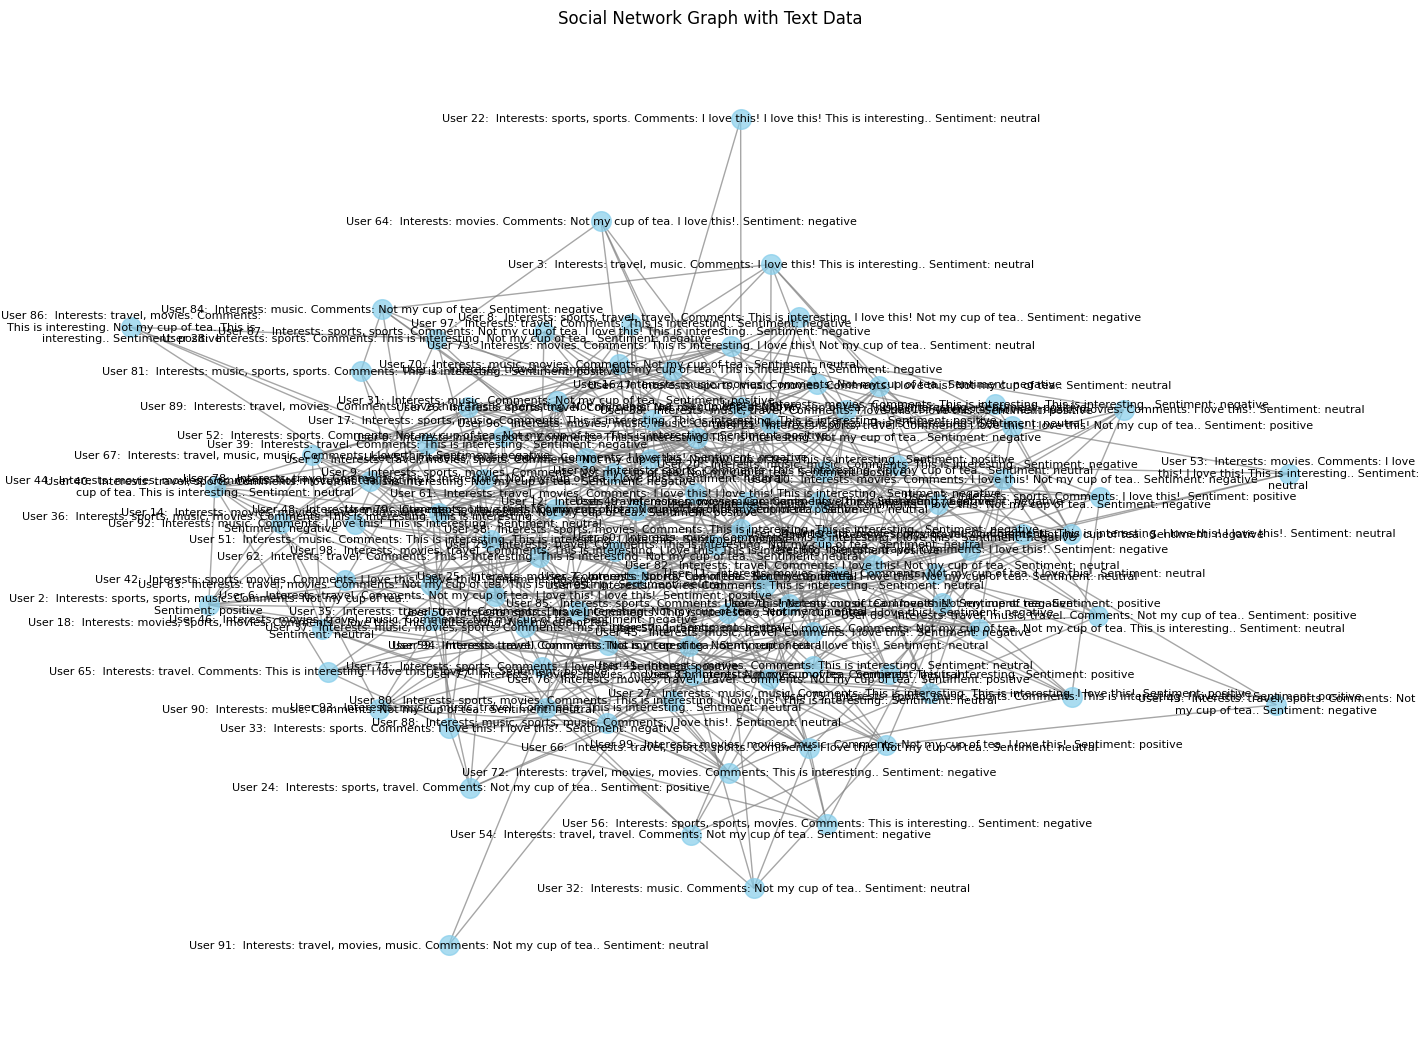

In [6]:
import matplotlib.pyplot as plt

# Draw the graph
plt.figure(figsize=(14, 10))
pos = nx.spring_layout(social_graph, seed=40)  # Position nodes using the spring layout algorithm
nx.draw(social_graph, pos, with_labels=False, node_size=200, node_color='skyblue', edge_color='gray', alpha=0.7)

# Add node text as labels
for node, (x, y) in pos.items():
    plt.text(x, y, social_graph.nodes[node]['text'], fontsize=8, ha='center', va='center', wrap=True)

plt.title("Social Network Graph with Text Data")
plt.show()